<a href="https://colab.research.google.com/github/AlyGamalAbusenna/House-Price-Prediction-Using-a-Neural-Network/blob/main/Lab_1_PyTorch_7454.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Loading the dataset and preprocessing

In [2]:
file_path = 'Housing-1.xlsx'  # Update this path if needed
df = pd.read_excel(file_path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [4]:
print(df.isnull().sum())
print(df.shape)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
(545, 13)


### Perform IQR Method to treat Outliers

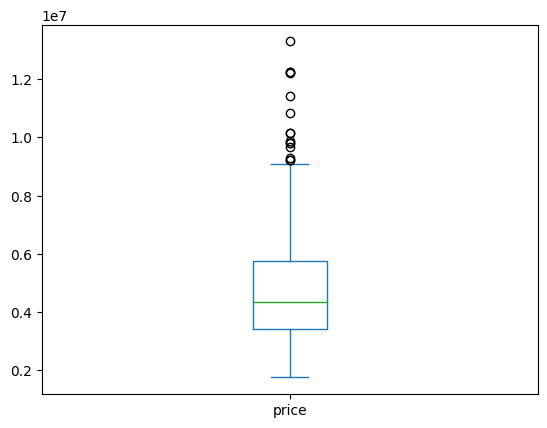

In [5]:
df['price'].plot(kind='box')
plt.show()

<ipython-input-6-48402dcecd3d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


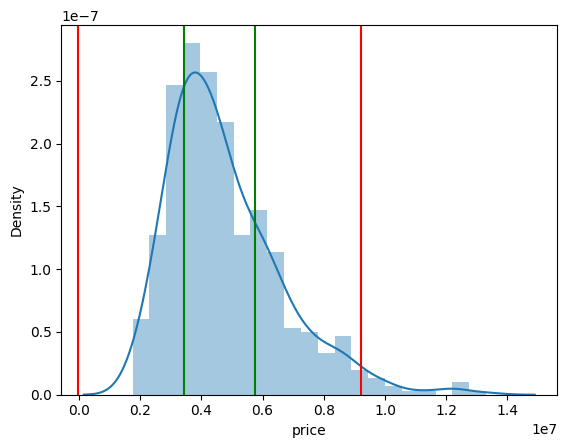

In [6]:
# finding the Quantiles:

Q1 = df.price.quantile(0.25)
Q2 = df.price.quantile(0.50)
Q3 = df.price.quantile(0.75)

# IQR : Inter-Quartile Range

IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

## Plot

sns.distplot(df.price)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [7]:
df = df[(df.price>LC) & (df.price<UC)]
df.shape

(530, 13)

<ipython-input-8-9b1d8fcbdd5c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


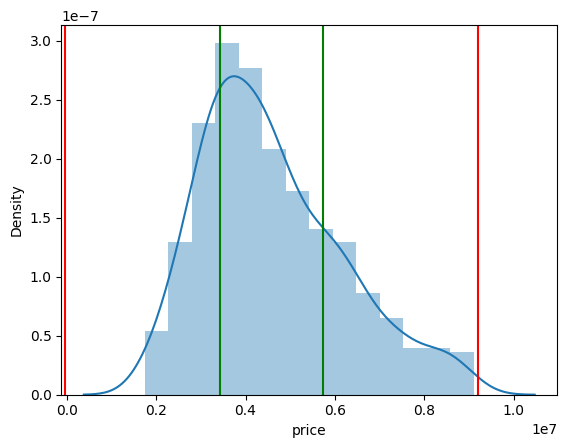

In [8]:
sns.distplot(df.price)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

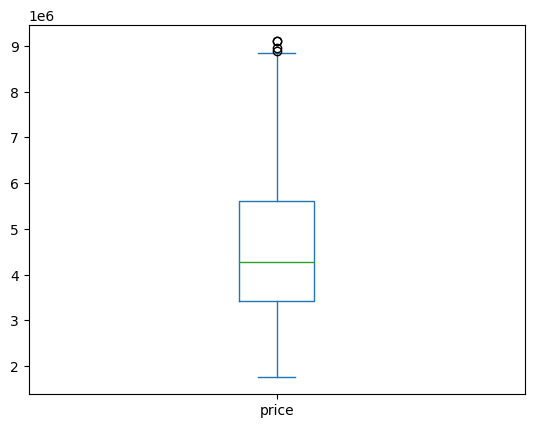

In [9]:
df['price'].plot(kind='box')
plt.show()

### Normalize the dataset

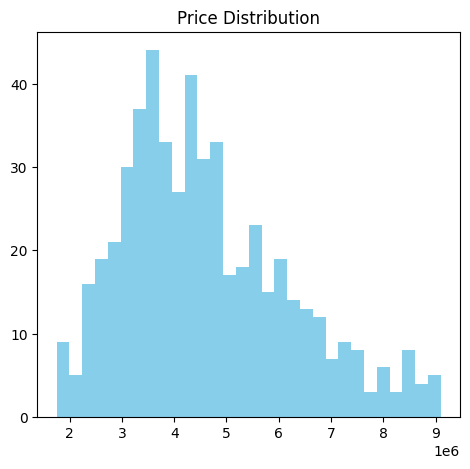

The skewness of `price` in the original data is 0.6957546545878598


In [10]:
# Visualize the distribution of price and area before normalization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=30, color='skyblue')
plt.title('Price Distribution')

plt.show()

print("The skewness of `price` in the original data is {}".format(df.price.skew()))

In [11]:
# Normalize `price` numericaly
scaler =  MinMaxScaler()
df[['price']] = scaler.fit_transform(df[['price']])

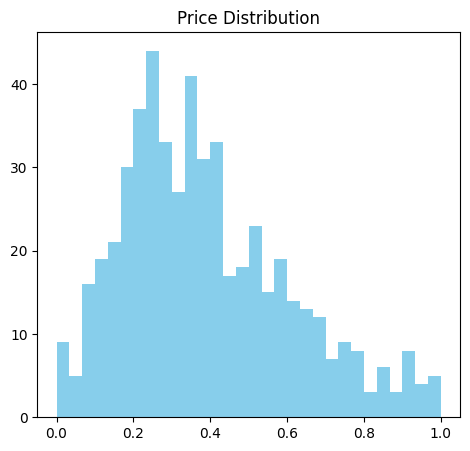

In [12]:
# Visualize the distribution of price after normalization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=30, color='skyblue')
plt.title('Price Distribution')

plt.show()

### Handling input features

In [13]:
# Define numeric and categorical columns
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


# One-hot encode the categorical features and scale the numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = preprocessor.fit_transform(df)

In [14]:
# Prepare the data (price as target)
y = torch.tensor(df['price'].values.reshape(-1, 1), dtype=torch.float32)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Convert X to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)

# Build the neural network model

**Neural Network Structure**

*  One Layer to take the input and output the price.


In [15]:
# Define the neural network architecture for multiple features
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, 1)  # Predicting one output (price)

    def forward(self, x):
        return self.fc(x)

# Initialize the model with the number of input features
input_size = X_train.shape[1]  # Get the number of features (after one-hot encoding)
model = SimpleNN(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

# Train the model

In [16]:
# Define training parameters
epochs = 1000
train_losses = []
val_losses = []
r2_scores = []

# Training loop
for epoch in range(epochs):
    # Set the model to training mode
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluate on validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        r2 = r2_score(y_val.detach().numpy(), val_outputs.detach().numpy())
        r2_scores.append(r2)

    # Save losses for visualization
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    # Print progress every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, R²: {r2:.4f}')


Epoch [100/1000], Loss: 0.0230, Val Loss: 0.0236, R²: 0.6402
Epoch [200/1000], Loss: 0.0164, Val Loss: 0.0153, R²: 0.7663
Epoch [300/1000], Loss: 0.0159, Val Loss: 0.0147, R²: 0.7763
Epoch [400/1000], Loss: 0.0159, Val Loss: 0.0146, R²: 0.7778
Epoch [500/1000], Loss: 0.0159, Val Loss: 0.0145, R²: 0.7782
Epoch [600/1000], Loss: 0.0159, Val Loss: 0.0145, R²: 0.7783
Epoch [700/1000], Loss: 0.0159, Val Loss: 0.0145, R²: 0.7783
Epoch [800/1000], Loss: 0.0159, Val Loss: 0.0145, R²: 0.7783
Epoch [900/1000], Loss: 0.0159, Val Loss: 0.0145, R²: 0.7783
Epoch [1000/1000], Loss: 0.0159, Val Loss: 0.0145, R²: 0.7783


# Visualize training

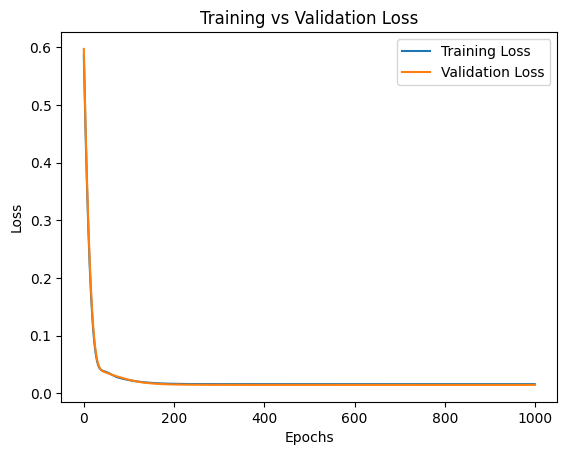

In [17]:
# Plot training and validation loss over epochs
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


# Visualize actual vs predicted values

In [18]:
# Evaluate the model on the validation set
model.eval()
with torch.no_grad():
    predictions = model(X_val).detach().numpy()
    actual = y_val.detach().numpy()

R2 = r2_score(actual, predictions)
print(f'R² Score: {R2:.4f}')

R² Score: 0.7783


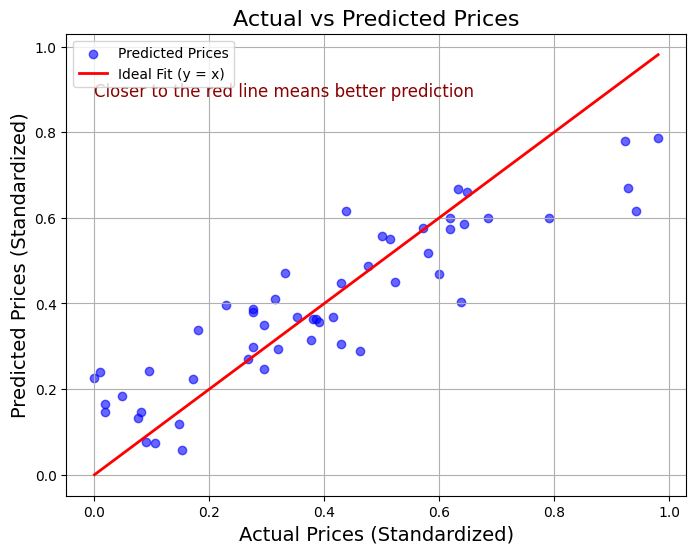

In [19]:
# Create the scatter plot with improved clarity
plt.figure(figsize=(8, 6))

plt.scatter(actual, predictions, color='blue', alpha=0.6, label='Predicted Prices')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', label='Ideal Fit (y = x)', linewidth=2)  # Line y=x for reference

plt.title('Actual vs Predicted Prices', fontsize=16)
plt.xlabel('Actual Prices (Standardized)', fontsize=14)
plt.ylabel('Predicted Prices (Standardized)', fontsize=14)
plt.legend()
plt.grid(True)

# Add text annotation for clarity
plt.text(min(actual), max(actual)*0.9, 'Closer to the red line means better prediction', fontsize=12, color='darkred')

plt.show()


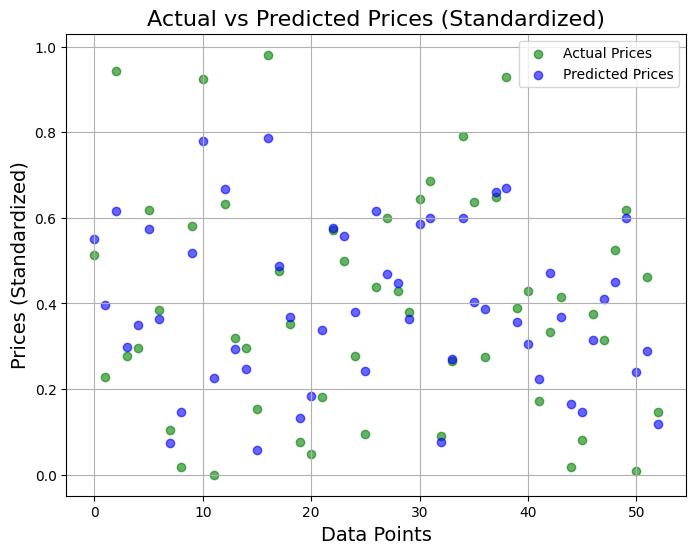

In [20]:
# Plot actual and predicted prices on the same figure
plt.figure(figsize=(8, 6))

# Plot actual prices
plt.scatter(range(len(actual)), actual, color='green', alpha=0.6, label='Actual Prices')

# Plot predicted prices
plt.scatter(range(len(predictions)), predictions, color='blue', alpha=0.6, label='Predicted Prices')

# Add title and labels
plt.title('Actual vs Predicted Prices (Standardized)', fontsize=16)
plt.xlabel('Data Points', fontsize=14)
plt.ylabel('Prices (Standardized)', fontsize=14)

# Add legend
plt.legend()

# Add grid for better visibility
plt.grid(True)

# Show plot
plt.show()
